In [48]:
import os
os.chdir('/data7/cschoi/sngal/NGC3367/phot/cut/fitting/sncosmo')
os.getcwd()
os.listdir()

['sncosmo_SN2018kp.txt', 'sncosmo_fit_1.png']

In [49]:
import astropy.io.ascii as ascii
import numpy as np
import sys
import sncosmo as sc
import sncosmo

In [3]:
gax=ascii.read('SN2017gax_griz_vstack.dat')

In [4]:
gax1=gax[gax['MAG']!=-99]

In [5]:
ab = sncosmo.get_magsystem('ab')

In [6]:
ab.zpbandflux('sdssg')
ab.zpbandflux('sdssr')
ab.zpbandflux('sdssi')
ab.zpbandflux('sdssz')


58382.807911645265

In [10]:
#import what_the_flux as wtf

In [11]:
gmag=gax1['MAG'][gax1['FILTER']=='g']
gmagerr=gax1['MAGERR'][gax1['FILTER']=='g']

In [12]:
gmagflux=ab.band_mag_to_flux(gmag, 'sdssg')

In [13]:
gmagfluxerr=gmagerr* np.log(10)/2.5*gmagflux

In [14]:
gmagflux[0],gmagflux[0]/5.466008340859812e-05


(0.14937236323101763, 2732.750371316139)

In [15]:
gmagfluxerr[0],gmagfluxerr[0]/5.466008340859812e-05

(0.0043753172998192685, 80.04593163740076)

flux 1.0= 10 **(-25/2.5) * ab_zp_flux(at badpass)

In [16]:
scale_g=10**(-10)*ab.zpbandflux('sdssg')

In [17]:
#gmagflux=gmagflux/scale_g
#gmagfluxerr=gmagfluxerr/scale_g

In [18]:
scale_r=10**(-10)*ab.zpbandflux('sdssr')

In [19]:
scale_i=10**(-10)*ab.zpbandflux('sdssi')

In [20]:
scale_z=10**(-10)*ab.zpbandflux('sdssz')

In [21]:
rmag=gax1[gax1['FILTER']=='r']['MAG']
rmagerr=gax1[gax1['FILTER']=='r']['MAGERR']
imag=gax1[gax1['FILTER']=='i']['MAG']
imagerr=gax1[gax1['FILTER']=='i']['MAGERR']
zmag=gax1[gax1['FILTER']=='z']['MAG']
zmagerr=gax1[gax1['FILTER']=='z']['MAGERR']

In [22]:
rmagflux=ab.band_mag_to_flux(rmag, 'sdssr')
rmagfluxerr=rmagerr* np.log(10)/2.5*rmagflux
#rmagflux=rmagflux/scale_r
#rmagfluxerr=rmagfluxerr/scale_r

In [23]:
imagflux=ab.band_mag_to_flux(imag, 'sdssi')
imagfluxerr=imagerr* np.log(10)/2.5*imagflux
#imagflux=imagflux/scale_i
#imagfluxerr=imagfluxerr/scale_i

In [24]:
zmagflux=ab.band_mag_to_flux(zmag, 'sdssz')
zmagfluxerr=zmagerr* np.log(10)/2.5*zmagflux
#zmagflux=zmagflux/scale_z
#zmagfluxerr=zmagfluxerr/scale_z

In [25]:
from astropy.table import Table, vstack

In [26]:
t=Table()
dd=gax1[gax1['FILTER']=='g']
band=['sdssg']*len(dd)
zp=[25]*len(dd)
zpsys=['ab']*len(dd)
t.add_column(dd['MJD'],name='time')
t.add_column(band,name='band')
t.add_column(gmagflux,name='flux')
t.add_column(gmagfluxerr,name='fluxerr')
t.add_column(zp,name='zp')
t.add_column(zpsys,name='zpsys')
tg=t

In [27]:
t=Table()
dd=gax1[gax1['FILTER']=='r']
band=['sdssr']*len(dd)
zp=[25]*len(dd)
zpsys=['ab']*len(dd)
t.add_column(dd['MJD'],name='time')
t.add_column(band,name='band')
t.add_column(rmagflux,name='flux')
t.add_column(rmagfluxerr,name='fluxerr')
t.add_column(zp,name='zp')
t.add_column(zpsys,name='zpsys')
tr=t

In [28]:
t=Table()
dd=gax1[gax1['FILTER']=='i']
band=['sdssi']*len(dd)
zp=[25]*len(dd)
zpsys=['ab']*len(dd)
t.add_column(dd['MJD'],name='time')
t.add_column(band,name='band')
t.add_column(imagflux,name='flux')
t.add_column(imagfluxerr,name='fluxerr')
t.add_column(zp,name='zp')
t.add_column(zpsys,name='zpsys')
ti=t

In [29]:
t=Table()
dd=gax1[gax1['FILTER']=='z']
band=['sdssz']*len(dd)
zp=[25]*len(dd)
zpsys=['ab']*len(dd)
t.add_column(dd['MJD'],name='time')
t.add_column(band,name='band')
t.add_column(zmagflux,name='flux')
t.add_column(zmagfluxerr,name='fluxerr')
t.add_column(zp,name='zp')
t.add_column(zpsys,name='zpsys')
tz=t

In [30]:
#t.write('SN2017ein-FLI-B.dat',format='ascii.commented_header',overwrite=True)

In [31]:
t=vstack([tg,tr,ti])
t.sort('time')#,'OBS')

t.write('SN2017gax-sncosmo.dat',format='ascii.commented_header',overwrite=True)

In [32]:
ls

cut/
cut_SN2017gax_g.dat
cut_SN2017gax_i.dat
cut_SN2017gax-LSGT-g.dat
cut_SN2017gax-LSGT-i.dat
cut_SN2017gax-LSGT-r.dat
cut_SN2017gax-LSGT-z.dat
cut_SN2017gax_r.dat
cut_SN2017gax_z.dat
fitting/
g-phot-old.dat*
i-phot-old.dat*
phot.obs.table_SN2021do.dat
r-phot-old.dat*
SN2017ein_2017gax_2021do_Rband_comparison_0.png
SN2017ein_2017gax_2021do_Rband_comparison.png
SN2017gax_griz_vstack.dat
SN2017gax_LC_final.eps
SN2017gax-LSGT-g_cut.dat
SN2017gax-LSGT-g.dat
SN2017gax-LSGT-i.dat
SN2017gax-LSGT-r.dat
SN2017gax-LSGT-z.dat
sn2017gax_phot_sn_space.csv
SN2017gax-sncosmo.dat
SN2017gax_sncosmo.png
sn2017gax_spectra_57980.13_-23.87.csv
sncosmofit.ipynb
sncosmofit.py


In [33]:
data=t
data

time,band,flux,fluxerr,zp,zpsys
float64,str5,float64,float64,int64,str2
57978.7511651,sdssr,0.02441150390235144,0.0009700018686823182,25,ab
57979.6641628,sdssg,0.14937236323101763,0.0043753172998192685,25,ab
57979.6713426,sdssr,0.11940830553251333,0.0029982977087054845,25,ab
57981.6928935,sdssg,0.37033115704550634,0.008557221061577951,25,ab
57981.6995718,sdssr,0.3404979766335409,0.007262565545912042,25,ab
57981.7062616,sdssi,0.2106388660464571,0.005361753675100887,25,ab
57981.7658218,sdssg,0.3771466479156307,0.009058168359609679,25,ab
57981.7725116,sdssr,0.34830085095921504,0.007737526405837318,25,ab
57981.7792014,sdssi,0.21935043910091329,0.006937108030296795,25,ab


In [34]:
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='v19-2007gr-corr',
                         effects=[dust,dust],
                         effect_names=['host','mw'],
                         effect_frames=['rest','obs'])
#‘nugent-sn1bc’
#‘v19-2007gr-corr’
#‘v19-2007gr’
model.param_names

#model.parameters

['z', 't0', 'amplitude', 'hostebv', 'hostr_v', 'mwebv', 'mwr_v']

In [35]:
model.set(z=0.004464)
model.set(mwr_v=3.1)
model.set(mwebv=0.021)
model.set(hostr_v=3.1)

In [36]:
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['t0', 'amplitude', 'hostebv'], 
    bounds={'z':(0., 0.005)}
)
print('fitting is done')
print("Number of chi^2 function calls:", result.ncall)
print("Number of degrees of freedom in fit:", result.ndof)
print("chi^2 value at minimum:", result.chisq)
print("model parameters:", result.param_names)
print("best-fit values:", result.parameters)
print("The result contains the following attributes:\n", result.keys())


fitting is done
Number of chi^2 function calls: 170
Number of degrees of freedom in fit: 408
chi^2 value at minimum: 32495.41180547497
model parameters: ['z', 't0', 'amplitude', 'hostebv', 'hostr_v', 'mwebv', 'mwr_v']
best-fit values: [ 4.46400000e-03  5.79947513e+04  8.41191741e-18 -5.08849524e-01
  3.10000000e+00  2.10000000e-02  3.10000000e+00]
The result contains the following attributes:
 dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])


In [37]:
result


      success: True
      message: 'Covariance may not be accurate. Covariance not positive definite. Covariance forced positive definite.'
        ncall: 170
        chisq: 32495.41180547497
         ndof: 408
  param_names: ['z', 't0', 'amplitude', 'hostebv', 'hostr_v', 'mwebv', 'mwr_v']
   parameters: array([ 4.46400000e-03,  5.79947513e+04,  8.41191741e-18, -5.08849524e-01,
        3.10000000e+00,  2.10000000e-02,  3.10000000e+00])
 vparam_names: ['t0', 'amplitude', 'hostebv']
   covariance: array([[1.96642309e-08, 9.87001133e-27, 4.15859667e-10],
       [9.87001133e-27, 2.20909199e-41, 9.30765594e-25],
       [4.15859667e-10, 9.30765594e-25, 3.92948160e-08]])
       errors: OrderedDict([('t0', 0.00014022920731804334), ('amplitude', 4.700097858643737e-21), ('hostebv', 0.00019822920074477485)])
         nfit: 1
    data_mask: array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True

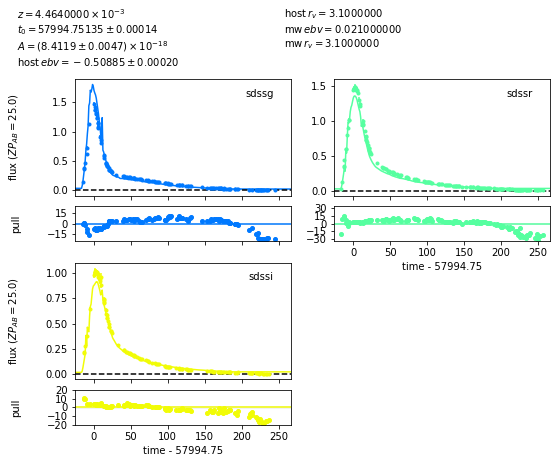

In [38]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors,fname='SN2017gax_sncosmo.png')